In [1]:
import sys

print(f"Interpreter dir: {sys.executable}")
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("../")

print(f"Working dir: {os.getcwd()}")
%load_ext autoreload
%autoreload 2

Interpreter dir: /Users/jsg/Documents/Stor/PdM_mockup/.venv_storpdm/bin/python3
Working dir: /Users/jsg/Documents/Stor/PdM_mockup


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from storpdm import DATA_PATH
from storpdm.make_dataset import download_dataset, import_dataset
from storpdm.visualize import visualise_sensor_correlation_all_engine
from storpdm.build_features import (
    find_correlated_data,
    list_correlated_data,
    find_time_independent_columns,
)

---

# Load data

In [3]:
# download_dataset()

In [4]:
df_rul, df_train, df_test = import_dataset(filename="FD001")

In [5]:
display(df_rul)
display(df_train)
display(df_train)

,rul
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


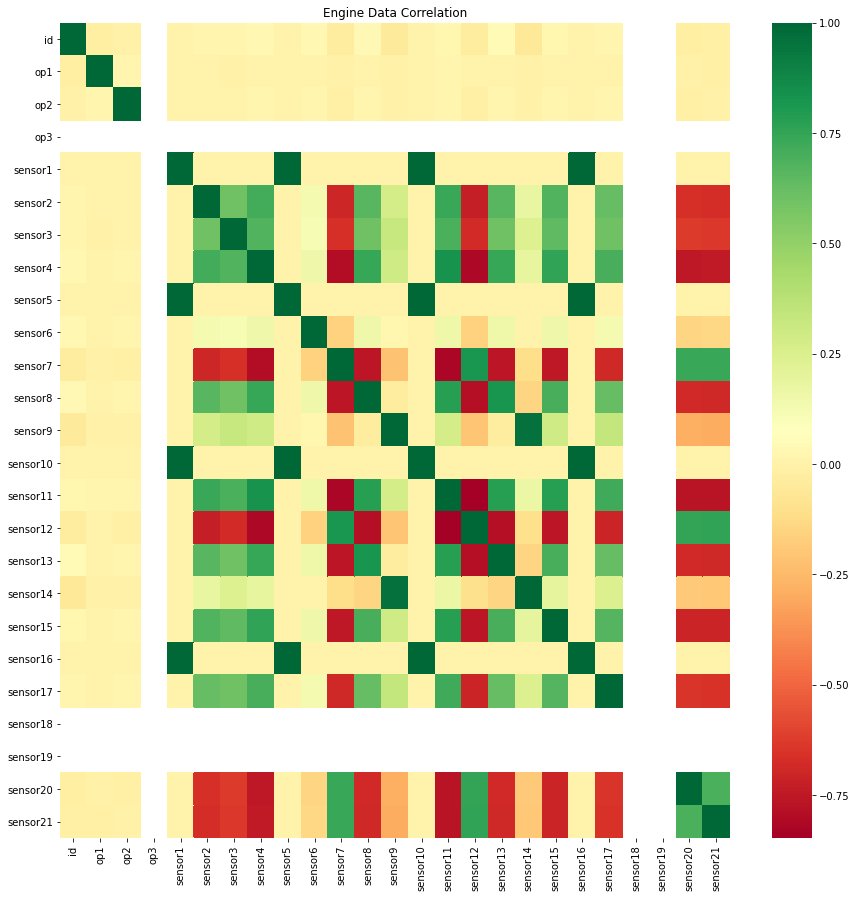

In [6]:
plt.figure(figsize=(15, 15))
visualise_sensor_correlation_all_engine(df_train)

# Data processing

- Remove correlated sensors
- Constant data with time
- ...

In [12]:
# Reduce / Eliminate highly-correlated sensors.
correlation_threshold = 0.95
correlated_data = find_correlated_data(df_train, correlation_threshold)

('sensor1', 'sensor5', 1.0)
('sensor1', 'sensor10', 1.0)
('sensor1', 'sensor16', 1.0)
('sensor5', 'sensor10', 1.0)
('sensor5', 'sensor16', 1.0)
('sensor9', 'sensor14', 0.9631566003059564)
('sensor10', 'sensor16', 1.0)


In [13]:
columns_to_be_removed = list_correlated_data(correlated_data)

In [16]:
columns_to_be_removed

['sensor5', 'sensor10', 'sensor16', 'sensor14']

In [18]:
print(f"Removing {columns_to_be_removed} from columns")
df_train_proc = df_train.drop(columns_to_be_removed, axis=1)

Removing ['sensor5', 'sensor10', 'sensor16', 'sensor14'] from columns


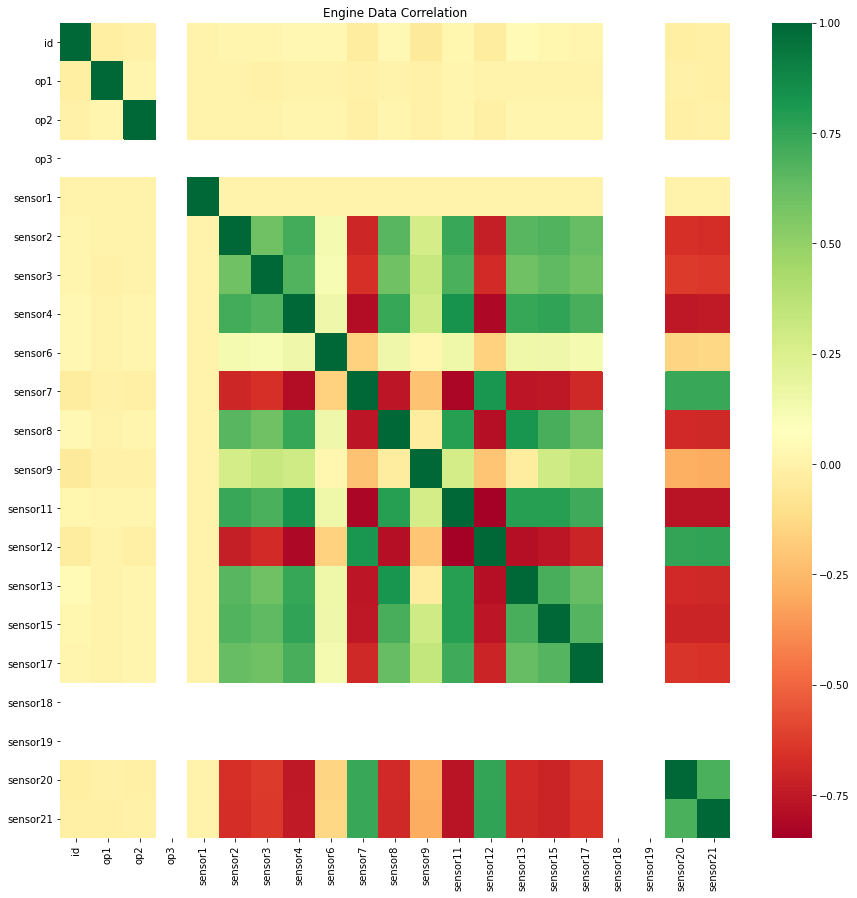

In [22]:
# Visualise correlations, extreme ones should have been removed
plt.figure(figsize=(15, 15))
visualise_sensor_correlation_all_engine(df_train_proc)